<a href="https://colab.research.google.com/github/Bmwissem/Hello-world-/blob/master/texture_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.optimizers import Adam
from keras.utils import to_categorical
 from sklearn.metrics import confusion_matrix
import matplotlib
matplotlib.use("Agg")

from sklearn.metrics import  classification_report

from os import listdir
from numpy import array
import tensorflow as tf
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import cv2
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from sklearn.preprocessing import LabelBinarizer

%matplotlib inline

IndentationError: ignored

# **Mounting the data from the drive**

In [0]:
from google.colab import drive, files
drive.mount('/content/drive/')
  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# **Loading the training and test data**

In [0]:

drive.mount('/content/drive/')

train_path =("/content/drive/My Drive/Colab Notebooks/Outex-CT-00011/train_/")
test_path= ("/content/drive/My Drive/Colab Notebooks/Outex-CT-00011/test_/")
train_labels_path=("/content/drive/My Drive/Colab Notebooks/Outex-CT-00011/train_label.csv")
train_file =os.listdir(train_path)
test_file = os.listdir(test_path)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Load the training data**

In [0]:
import csv

with open('/content/drive/My Drive/Colab Notebooks/Outex-CT-00011/train_labels.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    labels = []
    
    for row in readCSV:
       
        

        labels.append(row)
      

    print(labels)
 


In [0]:
files= []


for file in train_file:
    
        files.append(train_path + file)
        #labels.append(file.split('.')[-2])
        
print(files)

# **Reading the data **

In [0]:

data = []
for file in files:
    image = cv2.imread(file)
    image = np.rollaxis(image, 2, 2)
    data.append(image)
    
data = np.array(data)
print(data.shape)
#print(data)

(480, 128, 128, 3)


# **Model creation **

In [0]:
data = np.array(data, dtype="float") / 255.0

labels = np.array(labels)
from itertools import chain
labels=list(chain.from_iterable(labels))

#labels.flatten()
print(labels)


["'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas001'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas002'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas003'", "'canvas005'", "'canvas005'", "'canvas005'", "'canvas005'", "'canvas005'", "'canvas005'", "'canvas0

# Labels_encoding 

In [0]:
label_encoder = LabelEncoder()
values = array(labels)
labels= label_encoder.fit_transform(values)
#labels = np_utils.to_categorical(labels, 2)
print("Labels encoding :\n ",labels)

Labels encoding :
  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 16 16 

In [0]:

labels = np.array(labels)
labels=labels.flatten()

print(len(labels))


480


# **Test_data preparation**

In [0]:
import csv

with open('/content/drive/My Drive/Colab Notebooks/Outex-CT-00011/test_classes.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    test_labels = []
    for row in readCSV:
        
        test_labels.append(row)
        
    print(test_labels)
    

In [0]:
files_test= []

for file in test_file:
    
        files_test.append(test_path + file)
        
print(files_test)

In [0]:
test_data = []
for file in files_test:
    image = cv2.imread(file)
   
    image = np.rollaxis(image, 2, 2)
    test_data.append(image)
    
test_data = np.array(test_data)
#print(test_data)
#print(data)

In [0]:
test_data = np.array(test_data, dtype="float") / 255.0

test_labels = np.array(test_labels)
from itertools import chain
test_labels=list(chain.from_iterable(test_labels))

#labels.flatten()
print(test_labels)

In [0]:
label_encoder = LabelEncoder()
values = array(test_labels)
test_labels= label_encoder.fit_transform(values)
#labels = np_utils.to_categorical(labels, 2)
print(test_labels)

In [0]:
test_labels = np.array(test_labels)
test_labels=test_labels.flatten()
print(test_labels)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16

# Training with Model_02

In [0]:
#Hyper_parameters
INIT_LR = 1e-4
BS = 32
EPOCHS =50


In [0]:
def build():
		# Model_initialization
		model = Sequential()

		# first CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(16, (3, 3), padding="same",
			input_shape=(128,128,3)))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(16, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# second CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(64))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(24))
		model.add(Activation("softmax"))

		# return the constructed network architecture
    
		return model
  
   
model = build()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
activation_37 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 128, 128, 16)      2320      
_________________________________________________________________
activation_38 (Activation)   (None, 128, 128, 16)      0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 16)        0         
__________

In [0]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])


In [0]:
H=model.fit(data, labels,  validation_data=(test_data, test_labels),batch_size=BS, epochs=EPOCHS,shuffle=True)



Train on 480 samples, validate on 480 samples
Epoch 1/50
480/480 [==============================] - 36s 75ms/step - loss: 3.2530 - acc: 0.1521 - val_loss: 2.2420 - val_acc: 0.2771
Epoch 2/50
480/480 [==============================] - 34s 70ms/step - loss: 2.4972 - acc: 0.2292 - val_loss: 2.0996 - val_acc: 0.3042
Epoch 3/50
480/480 [==============================] - 34s 71ms/step - loss: 2.1986 - acc: 0.3250 - val_loss: 2.0319 - val_acc: 0.3500
Epoch 4/50
480/480 [==============================] - 34s 71ms/step - loss: 2.0578 - acc: 0.3625 - val_loss: 2.0148 - val_acc: 0.3479
Epoch 5/50
480/480 [==============================] - 34s 71ms/step - loss: 1.9495 - acc: 0.3625 - val_loss: 2.0749 - val_acc: 0.3979
Epoch 6/50
480/480 [==============================] - 34s 70ms/step - loss: 1.7217 - acc: 0.4854 - val_loss: 2.0390 - val_acc: 0.3979
Epoch 7/50
480/480 [==============================] - 34s 70ms/step - loss: 1.5794 - acc: 0.5542 - val_loss: 2.0584 - val_acc: 0.3646
Epoch 8/50
480/4

# **Prediction and_ testing_Phase**

In [0]:
'  evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_data, test_labels) 

print('Test accuracy:', test_acc)


480/480 [==============================] - 8s 16ms/step
Test accuracy: 0.59375


In [0]:
predictions =model.predict(test_data)

In [0]:
predictions[0]

array([0.63710946, 0.02453381, 0.03019132, 0.12500986, 0.03018584,
       0.00806795, 0.0068627 , 0.00778532, 0.00875983, 0.00174189,
       0.00394022, 0.00524384, 0.00478678, 0.00369793, 0.00655612,
       0.02417384, 0.00219795, 0.00119877, 0.01189756, 0.00140523,
       0.01699542, 0.00169874, 0.00466856, 0.03129102], dtype=float32)

In [0]:
np.argmax(predictions[0])

0

In [0]:
test_labels[0]

0

In [0]:
def plot_image(i, predictions_array, test_labels, img):
  predictions_array, test_labels, img = predictions_array[i], test_labels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == test_labels:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                test_labels),
                                color=color)

def plot_value_array(i, predictions_array, test_labels):
  predictions_array, test_labels = predictions_array[i], test_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[test_labels].set_color('blue')

In [0]:
image_index = 45 
plt.subplot(1,2,1)
plot_image(image_index, predictions, test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(image_index, predictions,  test_labels)

In [0]:
labels_data= ['canvas001','canvas002','canvas003','canvas005','canvas006','canvas009',
               'canvas011','canvas021','canvas022','canvas023','canvas025','canvas026','canvas031',
               'canvas032','canvas033','canvas035','canvas038','canvas039','carpet002','carpet004',
               'carpet004','carpet005','carpet009','tile005','tile006']


In [0]:

print(classification_report(test_labels,predictions.argmax(axis=-1)))



              precision    recall  f1-score   support

           0       0.56      0.95      0.70        20
           1       0.95      1.00      0.98        20
           2       0.82      0.90      0.86        20
           3       0.00      0.00      0.00        20
           4       0.77      1.00      0.87        20
           5       1.00      1.00      1.00        20
           6       0.33      0.15      0.21        20
           7       0.24      0.25      0.24        20
           8       0.58      0.35      0.44        20
           9       0.67      0.50      0.57        20
          10       0.55      0.90      0.68        20
          11       0.13      0.10      0.11        20
          12       0.95      1.00      0.98        20
          13       0.90      0.90      0.90        20
          14       1.00      0.25      0.40        20
          15       0.50      0.15      0.23        20
          16       0.62      1.00      0.77        20
          17       0.93    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
label_encoder = LabelEncoder()
values = array(target_names)
target_names= label_encoder.fit_transform(values)


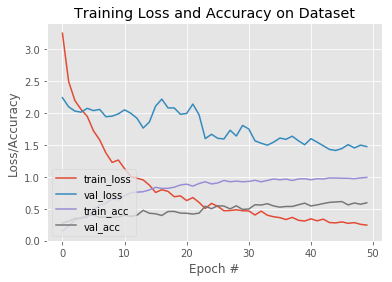

In [0]:

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])